In [6]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/47/78/27daa8e0287ce205908f089564472af42eb4646146a51d2fbb76ef8f3880/xgboost-3.0.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 325.1 kB/s eta 0:07:42
   ---------------------------------------- 0.0/150.0 MB 326.8 kB/s eta 0:07:39
   ---------------------------------------- 0.1/150.0 MB 722.1 kB/s eta 0:03:28
   ---------------------------------------- 0.2/150.0 MB 908.0 kB/s eta 0:02:45
   ---------------------------------------- 0.3/150.0 MB 983.0 kB/s eta 0:02:33
   ---------------------------------------- 0.3/150.0 MB 930.9 kB/s eta 0:02:41
   -----------------------------

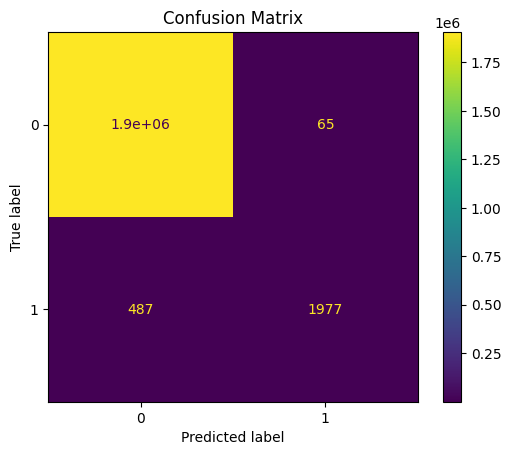

Accuracy: 0.9997
F1 Score: 0.8775
ROC AUC Score: 0.9976


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score

# Load the dataset from CSV
frauds_df = pd.read_csv("C:/Users/Aniket/Downloads/fraud detection model/fraud_detect.csv")  # Replace with your CSV file path

# Data Preprocessing
frauds_df.rename(columns={'type': 'Type', 'amount': 'Amount', 'nameOrig': 'Customer ID', 
                          'oldbalanceOrg': 'Customer Before', 'newbalanceOrig': 'Customer After', 
                          'nameDest': 'Destination ID', 'oldbalanceDest': 'Destination Before', 
                          'newbalanceDest': 'Destination After', 'isFraud': 'Fraud', 
                          'isFlaggedFraud': 'Flagged'}, inplace=True)

# Convert categorical variables to category type
frauds_df['Type'] = frauds_df['Type'].astype('category')

# One-hot encoding for categorical variables
frauds_df = pd.get_dummies(frauds_df, columns=['Type'], drop_first=True)

# Drop unnecessary columns
frauds_df.drop(columns=['Flagged', 'Customer ID', 'Destination ID'], inplace=True)

# Log transformation for skewed features
frauds_df[['Amount', 'Customer Before', 'Customer After', 'Destination Before', 'Destination After']] = \
    frauds_df[['Amount', 'Customer Before', 'Customer After', 'Destination Before', 'Destination After']].apply(np.log1p)

# Splitting the dataset
X = frauds_df.drop('Fraud', axis=1)
y = frauds_df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
